<a href="https://colab.research.google.com/github/KuldipDongare1707/Deep_Learning/blob/main/Early_Stopping_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [ ]:
X, y = make_circles(n_samples = 1000, noise = 0.2, random_state=1)

<Axes: >

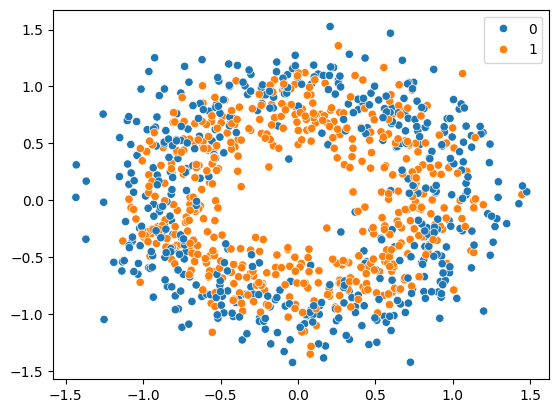

In [ ]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [9]:
history = model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs = 3500, verbose = 0)

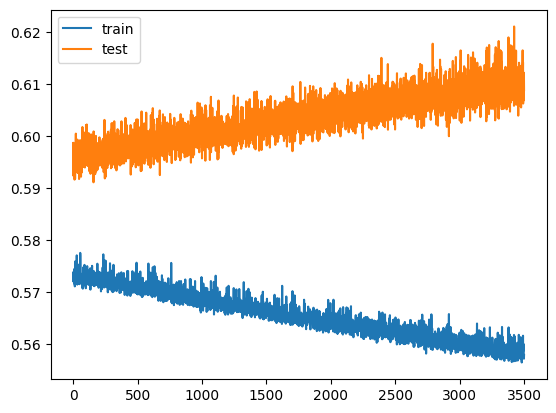

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


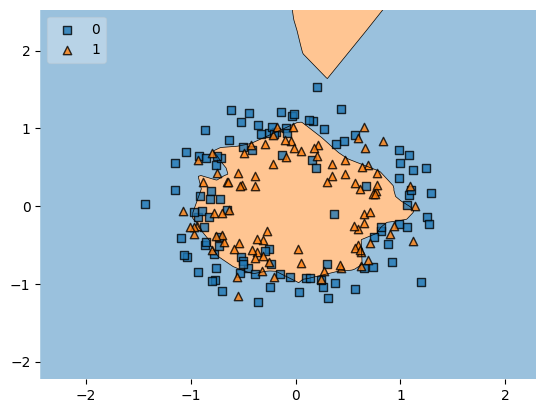

In [11]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend = 2)
plt.show()

In [12]:
## Early Stopping

In [13]:
model = Sequential()
model.add(Dense(256, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = True


)

In [19]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs =3500, callbacks = callback)

Epoch 1/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4982 - loss: 0.6998 - val_accuracy: 0.5350 - val_loss: 0.6887
Epoch 2/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5157 - loss: 0.6907 - val_accuracy: 0.5700 - val_loss: 0.6876
Epoch 3/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5759 - loss: 0.6867 - val_accuracy: 0.5700 - val_loss: 0.6855
Epoch 4/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6057 - loss: 0.6814 - val_accuracy: 0.5450 - val_loss: 0.6864
Epoch 5/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5527 - loss: 0.6837 - val_accuracy: 0.5650 - val_loss: 0.6796
Epoch 6/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6035 - loss: 0.6788 - val_accuracy: 0.5800 - val_loss: 0.6790
Epoch 7/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6229 - loss: 0.6750 - val_accuracy: 0.5800 - val_loss: 0.6739
Epoch 8/3500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6197 - loss: 0.6713 - val_accuracy: 0

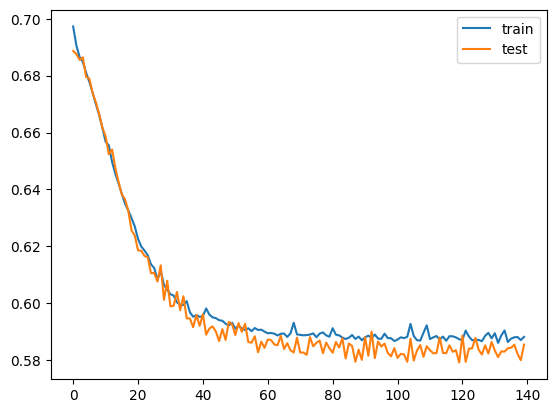

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


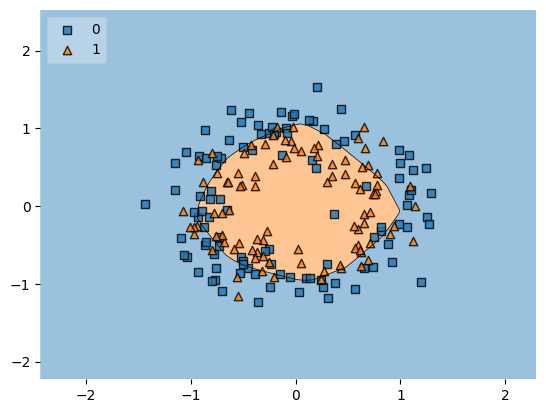

In [21]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend = 2)
plt.show()
